In [6]:
from cenpy import products
import matplotlib.pyplot as plt
import osmnx as ox

In [2]:
sd = products.ACS().from_place('San Diego, CA', level='tract',
                                        variables=['B00002*', 'B01002H_001E'])


Matched: San Diego, CA to San Diego city within layer Incorporated Places


C:\Users\dskon\AppData\Local\Temp\ipykernel_51128\639015818.py:1: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  sd = products.ACS().from_place('San Diego, CA', level='tract',


In [3]:
sd.head()

,GEOID,geometry,B01002H_001E,state,county,tract
0,06073010012,"POLYGON ((-13031330.990 3837056.990, -13031329...",47.5,06,073,010012
1,06073007903,"POLYGON ((-13051964.720 3869215.200, -13051923...",32.6,06,073,007903
2,06073008305,"POLYGON ((-13051530.240 3879241.240, -13051529...",27.8,06,073,008305
3,06073008501,"POLYGON ((-13050532.820 3873823.510, -13050506...",37.4,06,073,008501
4,06073008343,"POLYGON ((-13049184.300 3876911.210, -13049185...",33.7,06,073,008343


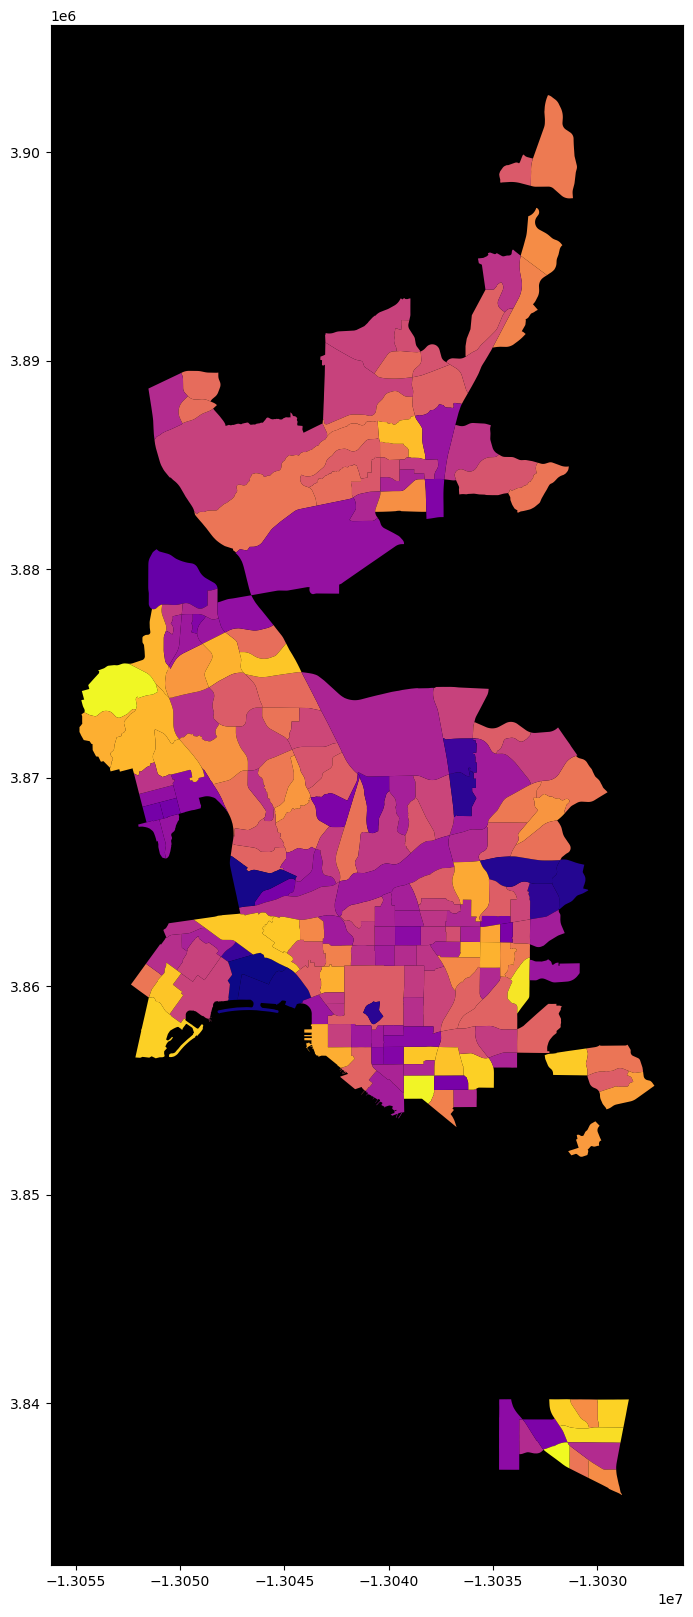

In [4]:
f, ax = plt.subplots(1,1,figsize=(20,20))
sd.dropna(subset=['B01002H_001E'], axis=0).plot('B01002H_001E', ax=ax, cmap='plasma')
ax.set_facecolor('k')

In [5]:
sd_data = products.ACS().from_place('San Diego, CA', 
                                           variables=['B02001_001E', 'B02001_003E'])



Matched: San Diego, CA to San Diego city within layer Incorporated Places


C:\Users\dskon\AppData\Local\Temp\ipykernel_51128\1698151852.py:1: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  sd_data = products.ACS().from_place('San Diego, CA',


In [8]:
sd_graph = ox.graph_from_place("San Diego, California, USA", network_type="drive")

In [9]:
sd_nodes, sd_edges  = ox.graph_to_gdfs(sd_graph)

In [10]:
sd_data = sd_data.to_crs(sd_edges.crs)

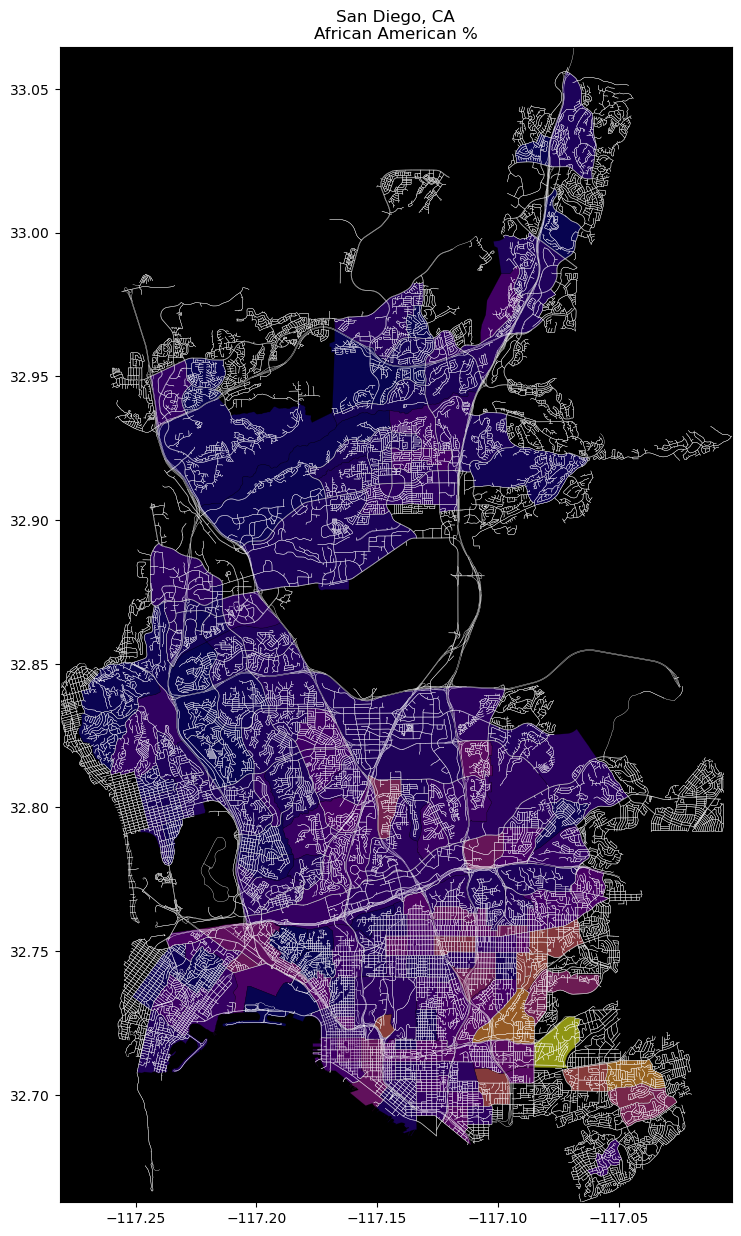

In [11]:
f,ax = plt.subplots(1,1, figsize=(15,15))
sd_data.eval('pct_afam = B02001_003E / B02001_001E')\
        .plot('pct_afam', cmap='plasma', alpha=.6, ax=ax, linewidth=.25, edgecolor='k')
sd_edges.plot(linewidth=.25, ax=ax, color='w')
ax.axis(sd_edges.total_bounds[[0,2,1,3]])
ax.set_title('San Diego, CA\nAfrican American %')
ax.set_facecolor('k')